# Now will try to implement KNN algorithm on the MNIST dataset 

## Import all the necessary dependencies

In [1]:
import os
import pickle 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics, neighbors, preprocessing, utils

## Load the data

* Also look at it using matplotlib

In [2]:
digits: utils.Bunch = datasets.load_digits() # type: ignore

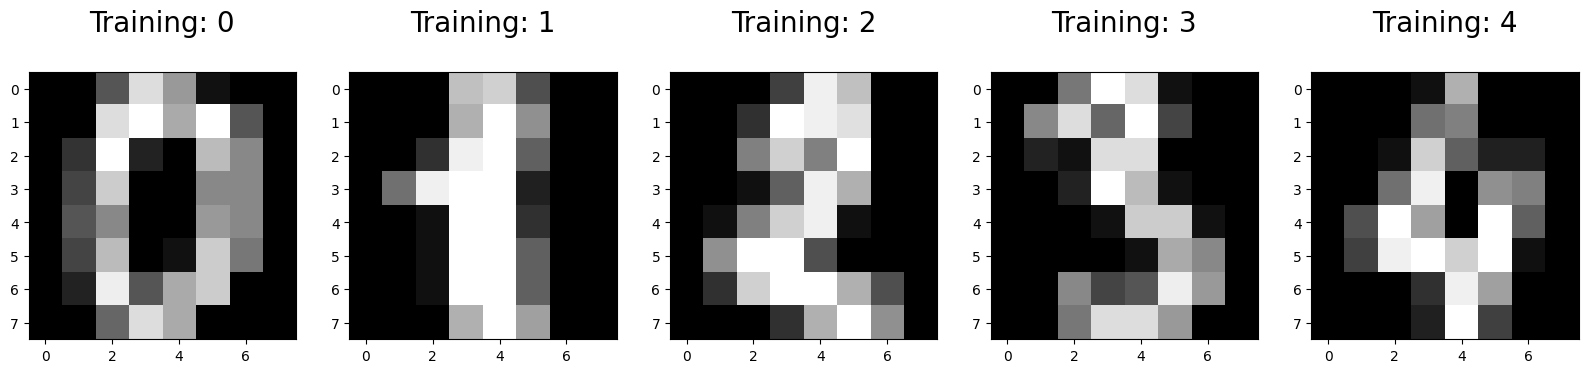

In [3]:
plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(digits.images[:5], digits.target[:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray) # type: ignore
    plt.title(f'Training: {label}\n', fontsize=20)

Flatten the images, so that they are of shape (samples, features) where samples is the number of images and features is the number of pixels in each image.

In [4]:
samples, w, h = digits.images.shape
print(f"Samples: {samples}, w: {w}, h: {h}, features: {w * h}")

Samples: 1797, w: 8, h: 8, features: 64


In [5]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
print(f"data.shape: {data.shape}")

data.shape: (1797, 64)


Split the data into training and testing sets. 80% of the data will be used for training and 20% for testing.

In [6]:
# But actually we don't need to reshape the images, because we can use the data directly. Which is a scikit-learn specific thing.
random_state = 335
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=random_state)

We should also normalize the data. We will use the StandarScaler from sklearn.preprocessing to do this.

In [7]:
scaler = preprocessing.StandardScaler()

# Fit on training set only.
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Build the model (**KNN**)
* Let's start the algorithm with k=2 for now: meaning we will look at the 2 closest neighbor to the test point and assign the label of that neighbor to the test point.

In [8]:
first_knn = neighbors.KNeighborsClassifier(n_neighbors=2)
first_knn.fit(X_train, y_train)
first_knn.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## And that's it. The model is trained. 🤯
<br>
Now, we can use the model to predict the labels of the test images.

In [9]:
y_pred = first_knn.predict(X_test)
y_pred

array([1, 6, 2, 5, 0, 0, 5, 9, 3, 8, 4, 1, 0, 2, 5, 4, 5, 0, 1, 0, 3, 4,
       5, 7, 6, 6, 6, 2, 8, 3, 4, 6, 4, 9, 3, 9, 1, 7, 5, 4, 7, 1, 7, 9,
       6, 5, 8, 1, 6, 0, 2, 4, 0, 2, 3, 4, 3, 8, 0, 0, 0, 9, 5, 1, 8, 4,
       7, 6, 5, 9, 7, 3, 8, 2, 6, 4, 1, 7, 3, 0, 5, 3, 2, 9, 2, 1, 9, 6,
       4, 4, 8, 9, 9, 1, 3, 5, 1, 1, 0, 6, 4, 8, 8, 7, 2, 1, 7, 5, 4, 7,
       6, 6, 6, 0, 6, 5, 3, 2, 2, 5, 3, 2, 7, 7, 0, 0, 3, 0, 2, 4, 2, 0,
       1, 5, 5, 5, 3, 0, 3, 2, 0, 1, 3, 9, 4, 1, 8, 0, 7, 4, 9, 3, 5, 0,
       5, 9, 7, 0, 9, 8, 2, 7, 4, 8, 6, 1, 5, 9, 9, 9, 6, 6, 4, 2, 0, 9,
       9, 9, 3, 9, 5, 9, 6, 7, 7, 9, 8, 4, 1, 3, 4, 6, 9, 0, 0, 1, 7, 8,
       6, 2, 3, 0, 8, 5, 4, 4, 1, 2, 6, 1, 0, 9, 5, 8, 1, 3, 4, 1, 3, 6,
       9, 4, 2, 6, 4, 6, 7, 8, 9, 9, 1, 7, 6, 2, 3, 7, 8, 8, 7, 6, 4, 6,
       6, 9, 7, 4, 6, 4, 2, 5, 6, 9, 1, 3, 2, 2, 1, 6, 4, 2, 2, 5, 9, 7,
       0, 1, 8, 7, 0, 8, 1, 0, 9, 1, 5, 8, 5, 6, 5, 5, 6, 0, 9, 3, 5, 8,
       1, 5, 5, 5, 2, 9, 3, 8, 4, 8, 9, 7, 7, 0, 8,

Now this doesn't look very useful 😅
<br>
Let's try some metrics to see how well our model performed.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.85      1.00      0.92        34
           2       1.00      0.97      0.98        32
           3       0.97      0.97      0.97        30
           4       0.95      0.95      0.95        37
           5       0.93      0.97      0.95        39
           6       0.93      0.97      0.95        38
           7       0.97      0.97      0.97        30
           8       0.94      0.83      0.88        35
           9       0.97      0.87      0.92        45

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



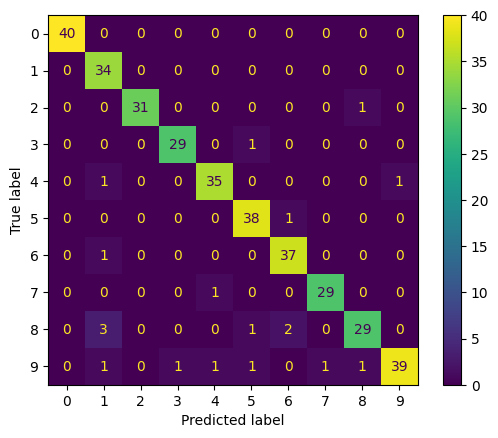

In [10]:
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, y_pred, normalize=None), display_labels=first_knn.classes_).plot()
print(metrics.classification_report(y_test, y_pred))

Now this is much better. We can see that our model is about 95% accurate. 😁
<br>
But can we do better? Let's try using a different value of k. (**Elbow Method**)

In [11]:
max_k = 30
error_rates = []

for k in range(1, max_k + 1):

    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rates.append(np.mean(y_pred != y_test))

Let's plot the error for different values of k.

best: 7


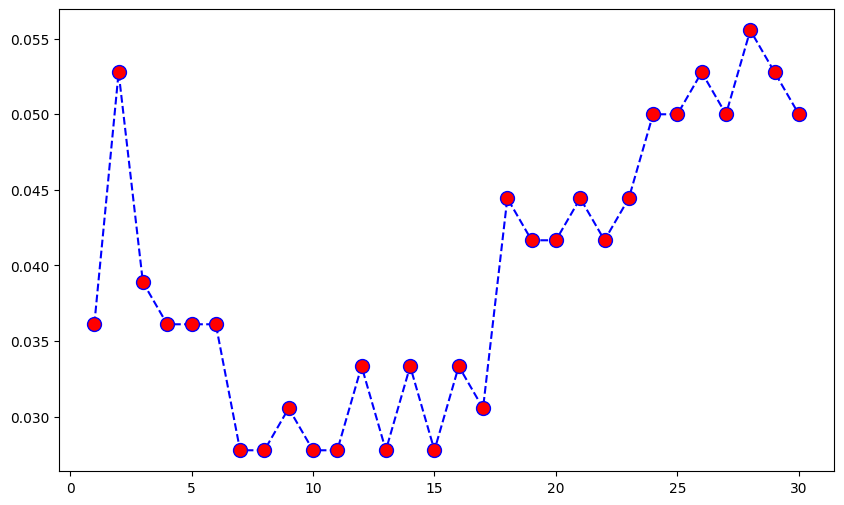

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), error_rates, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

best = np.argmin(error_rates) + 1
print(f"best: {best}")

We can see that the error is minimum for k=7. So we can use k=7 for our model.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.89      1.00      0.94        34
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        30
           4       1.00      0.95      0.97        37
           5       1.00      0.95      0.97        39
           6       0.97      1.00      0.99        38
           7       0.94      1.00      0.97        30
           8       0.97      0.89      0.93        35
           9       0.96      0.96      0.96        45

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



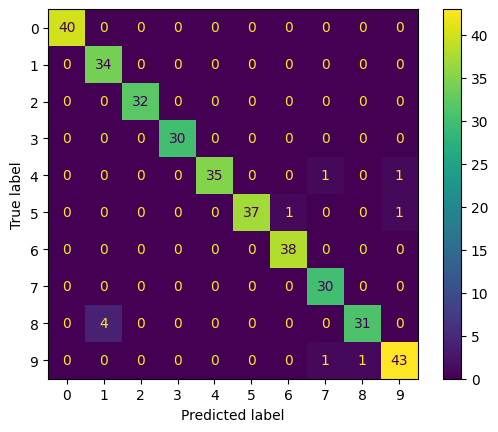

In [13]:
final_knn = neighbors.KNeighborsClassifier(n_neighbors=best)
final_knn.fit(X_train, y_train)
y_pred = final_knn.predict(X_test)

metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, y_pred, normalize=None), display_labels=final_knn.classes_).plot()
print(metrics.classification_report(y_test, y_pred))

The difference between k=2 and k=7 might look not that big. Because the dataset is very small. But for larger datasets, the difference will be much more significant.
<br>
That being said, let's see what the wrong predictions look like. 

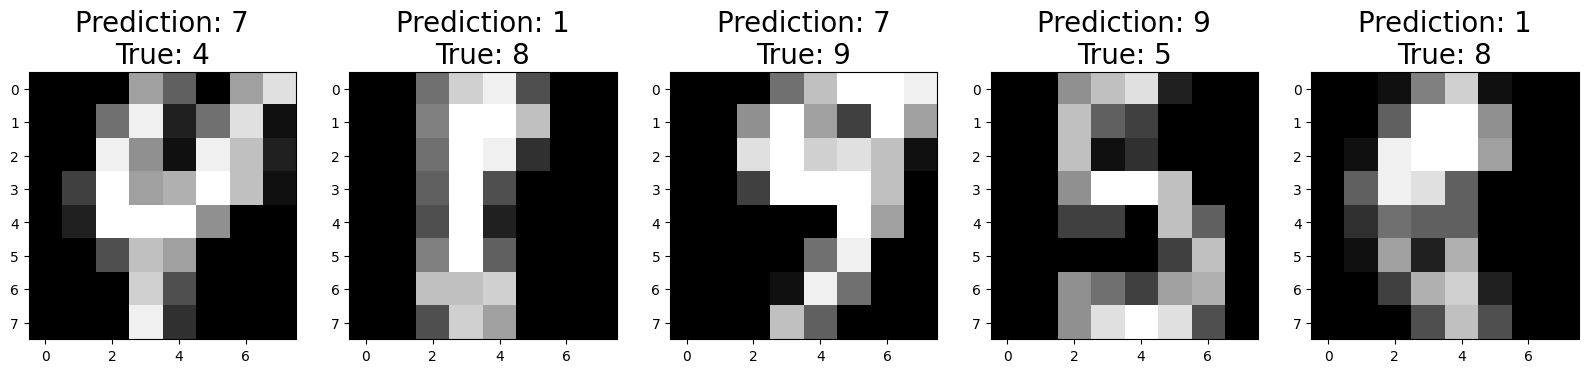

In [14]:
_, test, _, _ = train_test_split(digits.data, digits.target, test_size=0.2, random_state=random_state)
test = test.reshape(-1, 8, 8)
indices = np.where(y_test != y_pred)[0][:5]

plt.figure(figsize=(20, 4))
for index, (image, pred_label, true_label) in enumerate(zip(test[indices], y_pred[indices], y_test[indices])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray) # type: ignore
    plt.title(f'Prediction: {pred_label}\nTrue: {true_label}', fontsize=20)

## Finally, let's save the model for later use, and the data as well.

In [15]:
path = 'knn/'
os.makedirs(path, exist_ok=True)

with open(os.path.join(path, 'model.pkl'), 'wb') as file:
    pickle.dump(final_knn, file)
      
loaded_model = pickle.load(open(os.path.join(path, 'model.pkl'), 'rb'))
result = loaded_model.predict(X_test) 
all(y_pred == result)

True

In [16]:
np.savetxt(os.path.join(path, 'results.csv'), y_pred, delimiter=',', fmt='%d')

# CONGRATULATIONS! 🎉🎉🎉